In [2]:
# Cell 1 - Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cell 2 - Read data
# Read the CSV file
df = pd.read_csv('allruns.csv')  # Replace with your CSV file path

# Fill missing values with defaults
df['telescope'].fillna('uGMRT', inplace=True)
df['t_int'].fillna(500, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6967 entries, 0 to 6966
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   score         6387 non-null   float64
 1   r2_1          5785 non-null   float64
 2   r2_2          5785 non-null   float64
 3   epochs        4179 non-null   float64
 4   kernel_size   4179 non-null   float64
 5   points        4179 non-null   float64
 6   model_param1  4179 non-null   float64
 7   model_param2  4179 non-null   float64
 8   telescope     6967 non-null   object 
 9   t_int         6967 non-null   float64
 10  label         6075 non-null   object 
dtypes: float64(9), object(2)
memory usage: 598.9+ KB
None


/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_23289/2829245136.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['telescope'].fillna('uGMRT', inplace=True)
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_23289/2829245136.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

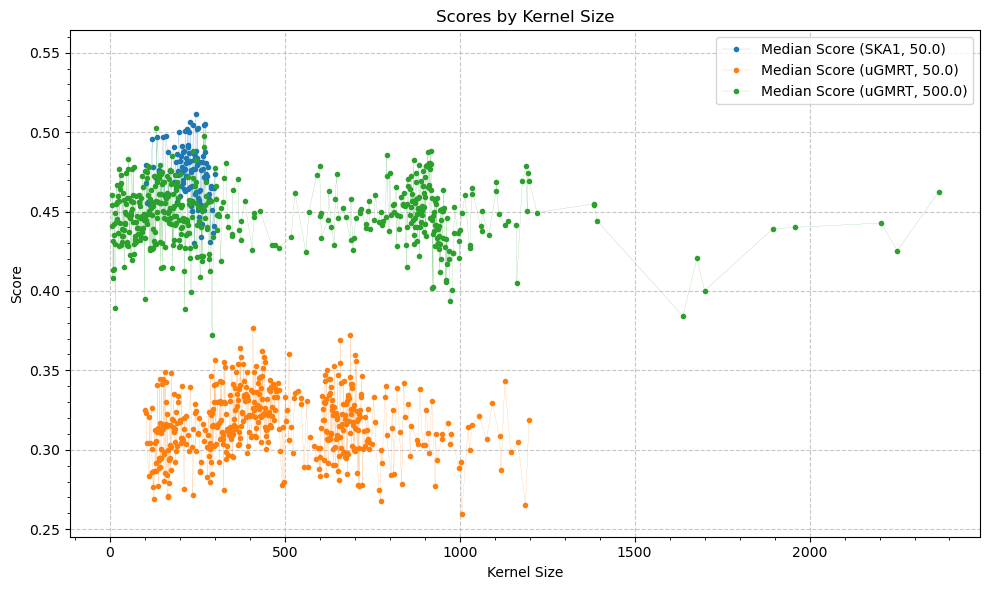

In [4]:
# Cell 3 - Create visualization
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot individual points
sns.scatterplot(data=df, x='kernel_size', y='score', alpha=0.5, s=0.01)

# Calculate median scores for each combination of telescope, t_int, and kernel size
median_scores = df.groupby(['telescope', 't_int', 'kernel_size'])['score'].median().reset_index()

# Plot median points and connect them with a line for each telescope and t_int
for (telescope, t_int), group in median_scores.groupby(['telescope', 't_int']):
    plt.plot(group['kernel_size'], group['score'], marker='.', linewidth=0.1, label=f'Median Score ({telescope}, {t_int})')

# Customize the plot
plt.title('Scores by Kernel Size')
plt.xlabel('Kernel Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.minorticks_on()  # Enable minor ticks

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
# Cell 4 - Filter and print specific rows
filtered_df = df[(df['kernel_size'] > 900) & (df['score'] > 0.487)]
print(filtered_df[['kernel_size', 'score', 'telescope', 't_int']].to_string())

      kernel_size     score telescope  t_int
2903        917.0  0.488311     uGMRT  500.0
2909        908.0  0.487455     uGMRT  500.0
2910        917.0  0.488311     uGMRT  500.0
2935        917.0  0.488311     uGMRT  500.0
2967        908.0  0.487455     uGMRT  500.0
2980        908.0  0.487455     uGMRT  500.0
3055        908.0  0.487455     uGMRT  500.0
3067        917.0  0.488311     uGMRT  500.0
3084        917.0  0.488311     uGMRT  500.0
3085        917.0  0.488311     uGMRT  500.0
3089        917.0  0.488311     uGMRT  500.0
3092        917.0  0.488311     uGMRT  500.0
3097        917.0  0.488311     uGMRT  500.0
3152        917.0  0.488311     uGMRT  500.0
3164        917.0  0.488311     uGMRT  500.0
3227        917.0  0.488311     uGMRT  500.0
3336        917.0  0.488311     uGMRT  500.0
3349        917.0  0.488311     uGMRT  500.0
3358        908.0  0.487455     uGMRT  500.0
3362        908.0  0.487455     uGMRT  500.0


In [6]:
# Cell 4 - Filter and print specific rows
filtered_df = df[df['score'] > 0.51]
print(filtered_df[['kernel_size', 'score', 'telescope', 't_int']].to_string())

      kernel_size     score telescope  t_int
136           NaN  0.614098     uGMRT  500.0
137           NaN  0.564420     uGMRT  500.0
138           NaN  0.630877     uGMRT  500.0
139           NaN  0.623356     uGMRT  500.0
140           NaN  0.589949     uGMRT  500.0
141           NaN  0.562574     uGMRT  500.0
142           NaN  0.576855     uGMRT  500.0
1689        268.0  0.516771     uGMRT  500.0
1798        268.0  0.510650     uGMRT  500.0
1811        268.0  0.511287     uGMRT  500.0
1857        268.0  0.510761     uGMRT  500.0
1908        268.0  0.513268     uGMRT  500.0
1961        268.0  0.512463     uGMRT  500.0
2002        268.0  0.511569     uGMRT  500.0
2167        268.0  0.511200     uGMRT  500.0
2183        268.0  0.510015     uGMRT  500.0
2196        268.0  0.511039     uGMRT  500.0
2221        268.0  0.510956     uGMRT  500.0
2230        268.0  0.513894     uGMRT  500.0
2251        268.0  0.511287     uGMRT  500.0
2264        268.0  0.511029     uGMRT  500.0
2321      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   score         659 non-null    float64
 1   r2_1          659 non-null    float64
 2   r2_2          659 non-null    float64
 3   epochs        659 non-null    int64  
 4   kernel_size   659 non-null    int64  
 5   points        659 non-null    int64  
 6   model_param1  659 non-null    int64  
 7   model_param2  659 non-null    int64  
 8   telescope     0 non-null      float64
 9   t_int         0 non-null      float64
 10  label         659 non-null    object 
dtypes: float64(5), int64(5), object(1)
memory usage: 56.8+ KB
None


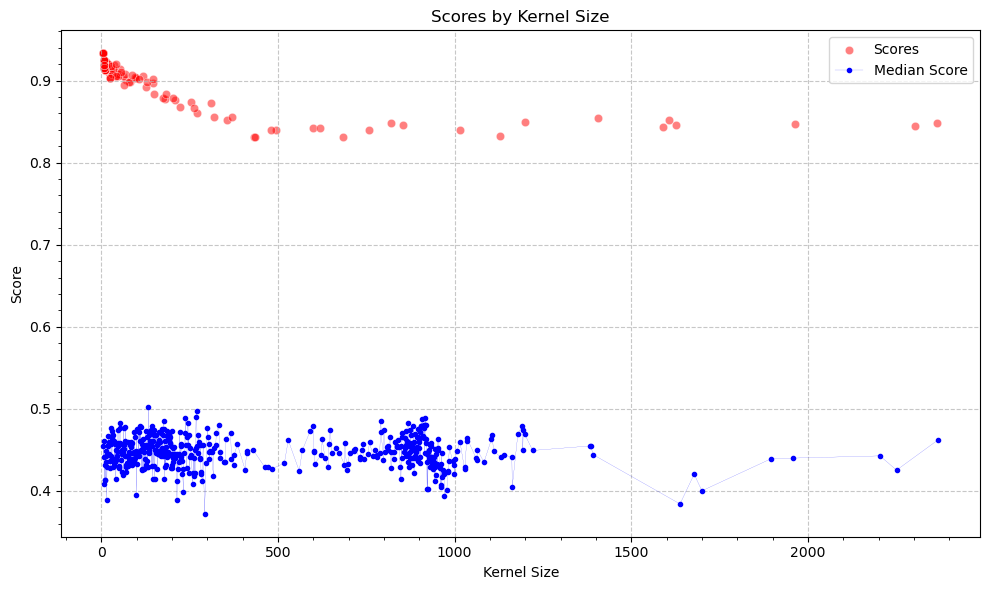

In [7]:
df = pd.read_csv('puresignal_run.csv')  # Replace with your CSV file path
print(df.info())
# Cell 3 - Create visualization
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot individual points
sns.scatterplot(data=df, x='kernel_size', y='score', alpha=0.5, c='red', label='Scores')

# Calculate median scores for each combination of telescope, t_int, and kernel size
median_scores = df.groupby('kernel_size')['score'].median().reset_index()

# Plot median points and connect them with a line for each telescope and t_int
plt.plot(group['kernel_size'], group['score'], marker='.', linewidth=0.1, c='blue', label=f'Median Score')

# Customize the plot
plt.title('Scores by Kernel Size')
plt.xlabel('Kernel Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.minorticks_on()  # Enable minor ticks

# Show the plot
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, nan to nan
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   score            1 non-null      float64
 1   r2_1             1 non-null      float64
 2   r2_2             0 non-null      float64
 3   epochs           0 non-null      float64
 4   kernel_size      0 non-null      float64
 5   points           998 non-null    int64  
 6   model_param1     998 non-null    int64  
 7   model_param2     0 non-null      float64
 8   telescope        0 non-null      float64
 9   t_int            998 non-null    object 
 10  label            998 non-null    int64  
 11  ps_bins_to_make  998 non-null    int64  
 12  ps_bins_to_use   0 non-null      float64
dtypes: float64(8), int64(4), object(1)
memory usage: 109.2+ KB
None


KeyError: 'ps_bins_to_use'

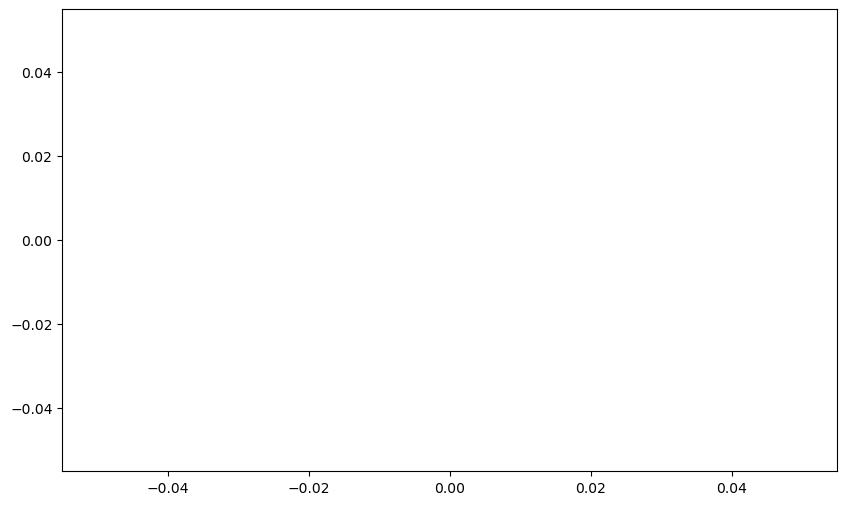

In [14]:
df = pd.read_csv('xgb_ps_results.csv')  # Replace with your CSV file path
print(df.info())
# Cell 3 - Create visualization
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot individual points
sns.scatterplot(data=df, x='ps_bins_to_use', y='score', alpha=0.5, c='red', label='Scores')

# Calculate median scores for each combination of telescope, t_int, and kernel size
median_scores = df.groupby('ps_bins_to_use')['score'].median().reset_index()

# Plot median points and connect them with a line for each telescope and t_int
plt.plot(group['ps_bins_to_use'], group['score'], marker='.', linewidth=0.1, c='blue', label=f'Median Score')

# Customize the plot
plt.title('Scores by Kernel Size')
plt.xlabel('Kernel Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.minorticks_on()  # Enable minor ticks

# Show the plot
plt.tight_layout()
plt.show()